In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


In [2]:
clist1 =['#ffffff','#f8ad9d','#3a20f0','#000000']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)

In [3]:
with open('/N/project/Zli_lab/Data/GSDR/QC_d_data_US/US_010008.txt', 'r') as file:
    lines = file.readlines()

In [4]:
lat, lon, elev, number_of_record, perc_miss, start_date, end_date, time_zone = [], [], [], [], [], [], [], []
directory = 'QC_d_data_US/'

file_count = 0

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_count += 1
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r') as file:
            lines = file.readlines()
            lines = lines[0:21]
            lat.extend([float(line.split(': ')[1].strip()) for line in lines if 'Latitude' in line])
            lon.extend([float(line.split(': ')[1].strip()) for line in lines if 'Longitude' in line])
            elev.extend([float(line.split(': ')[1].replace('m', '').strip()) for line in lines if 'Elevation' in line])
            number_of_record.extend([int(line.split(': ')[1].strip()) for line in lines if 'Number of records' in line])
            perc_miss.extend([float(line.split(': ')[1].strip()) for line in lines if 'Percent missing data' in line])
            start_date.extend([line.split(': ')[1].strip() for line in lines if 'Start datetime' in line])
            end_date.extend([line.split(': ')[1].strip() for line in lines if 'End datetime' in line])
            time_zone.extend([line.split(': ')[1].strip() for line in lines if 'Time Zone' in line])
        if file_count % 1000 == 0:
            print("I'm OK "+str(file_count))

FileNotFoundError: [Errno 2] No such file or directory: 'QC_d_data_US/'

In [5]:
data = {
    'latitude': lat,
    'longitude': lon,
    'elevation': elev,
    'number of record': number_of_record,
    'percentage of missing data': perc_miss,
    'start datetime': start_date,
    'end datetime': end_date,
    'time zone': time_zone
}
df = pd.DataFrame(data)
# df.to_csv('basci_info_GSDR.csv', index=False)

In [6]:
df

Empty DataFrame
Columns: [latitude, longitude, elevation, number of record, percentage of missing data, start datetime, end datetime, time zone]
Index: []

In [7]:
df = pd.read_csv('/N/project/Zli_lab/Data/GSDR/basci_info_GSDR.csv')

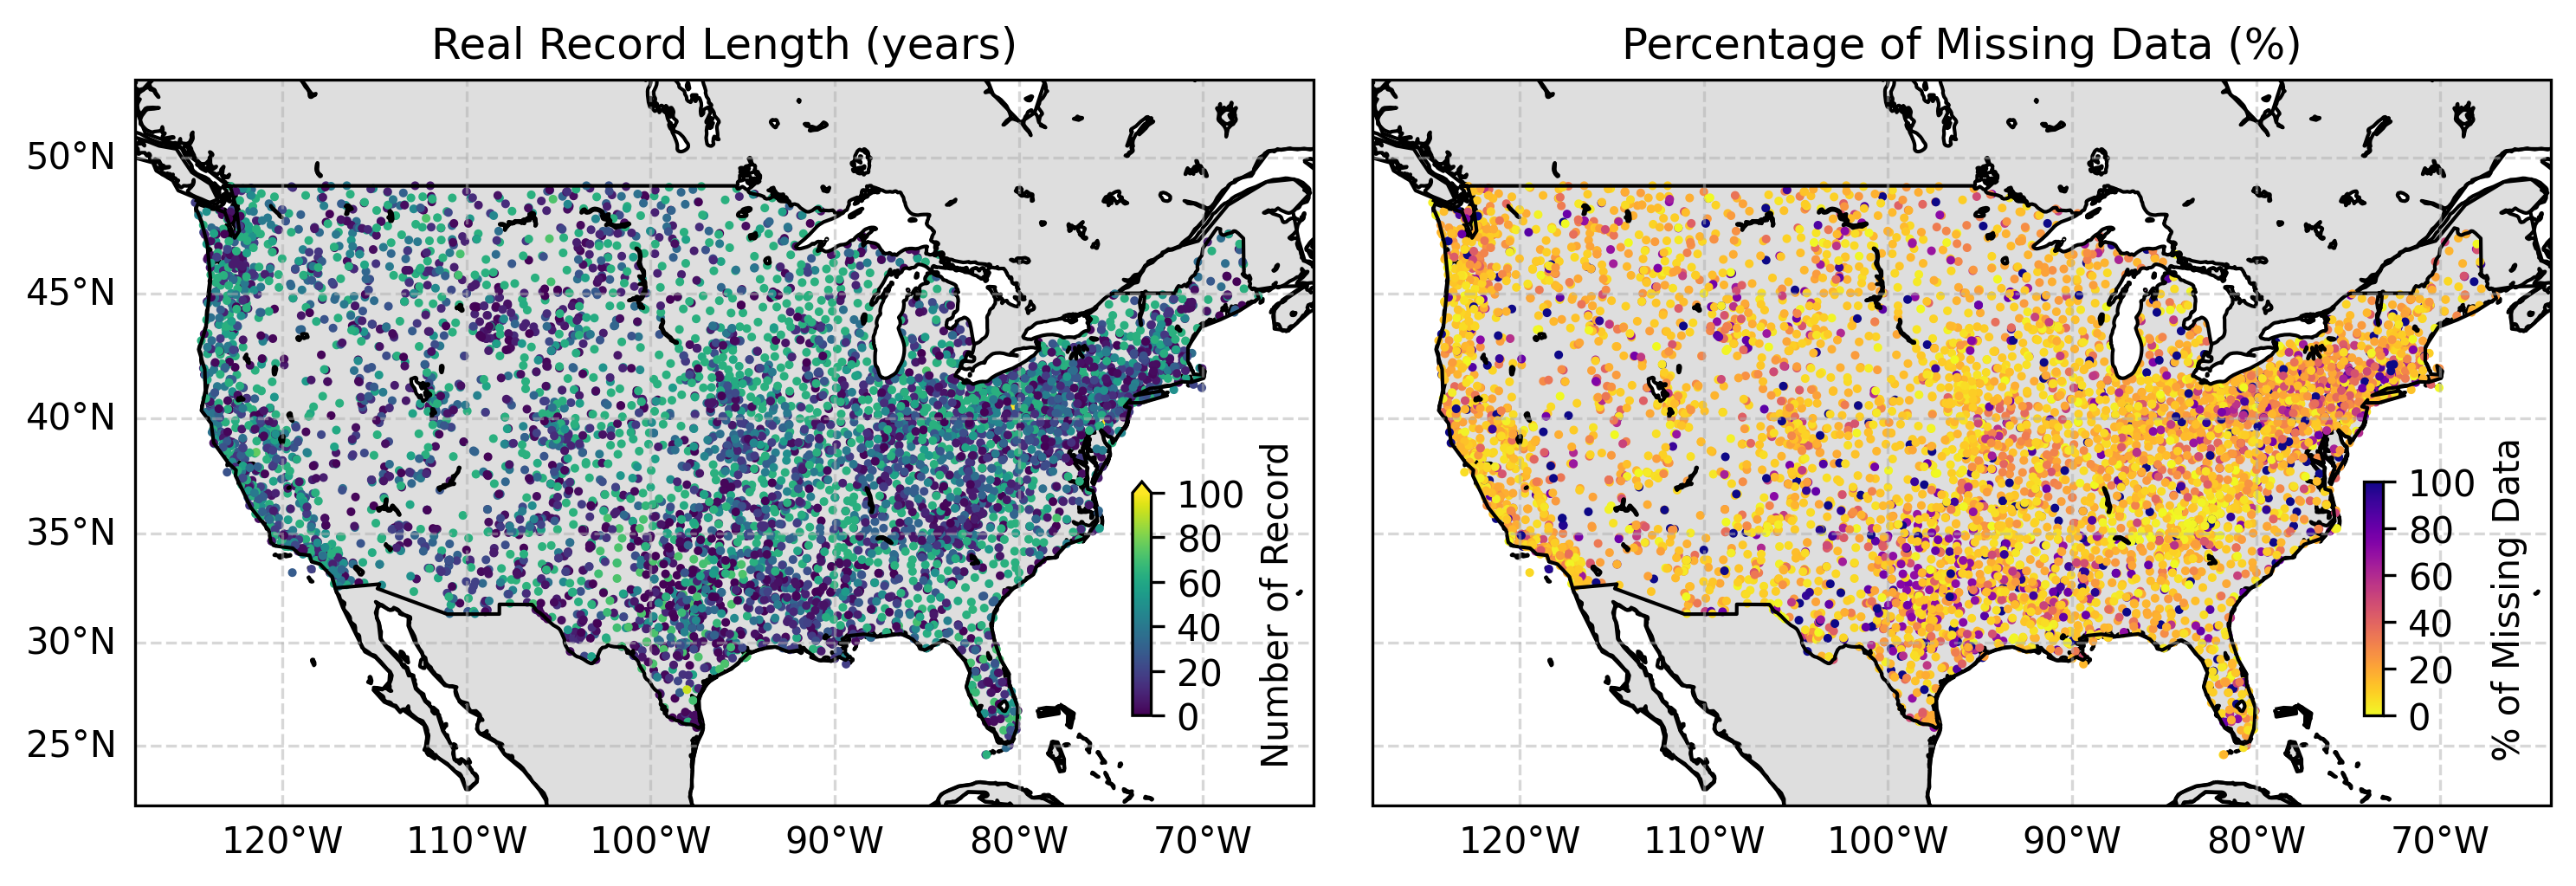

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300, subplot_kw={'projection': ccrs.Mercator()})
extent = [-128, -64, 22, 48]

for ax in axes:
    ax.set_extent(extent, crs=ccrs.Geodetic())
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#dedede')
    ax.add_feature(cfeature.BORDERS, linestyle='-')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='w')
    ax.coastlines(resolution='110m')

# Plot for Real Record Length (years)
axes[0].set_title('Real Record Length (years)')
sc1 = axes[0].scatter(df['longitude'], df['latitude'], c=df['number of record']/8760, cmap='viridis', s=2, transform=ccrs.Geodetic())
cax1 = fig.add_axes([0.445, 0.32, 0.006, 0.15]) 
cbar1 = plt.colorbar(sc1, cax=cax1,extend='max')
cbar1.set_label('Number of Record')
sc1.set_clim(vmin=0.0, vmax=100)
cbar1.set_ticks([0, 20, 40, 60, 80, 100])
gridlines1 = axes[0].gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines1.right_labels = False  
gridlines1.top_labels = False    

# Plot for Percentage of Missing Data (%)
axes[1].set_title('Percentage of Missing Data (%)')
sc2 = axes[1].scatter(df['longitude'], df['latitude'], c=df['percentage of missing data'], cmap='plasma_r', s=2, transform=ccrs.Geodetic())

cax2 = fig.add_axes([0.84, 0.32, 0.006, 0.15]) 
cbar2 = plt.colorbar(sc2, cax=cax2,)
cbar2.set_label('% of Missing Data')
sc2.set_clim(vmin=0.0, vmax=100)
cbar2.set_ticks([0, 20, 40, 60, 80, 100])
gridlines2 = axes[1].gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines2.right_labels = False  
gridlines2.top_labels = False   
gridlines2.left_labels = False  

fig.subplots_adjust(wspace=0.05)
plt.show()

In [8]:
df

latitude  longitude  elevation  number of record  \
0     39.53333 -121.56667       92.0            276144   
1     39.91250  -82.00420      213.0            554915   
2     32.33333  -90.23333       98.0            136595   
3     38.07330  -88.18050      102.0            208188   
4     33.20000  -87.55000       70.0             75264   
...        ...        ...        ...               ...   
6600  37.19540 -105.42420     2421.0            512088   
6601  32.33333  -88.75000       89.0             57020   
6602  37.96667 -118.31667     2166.0             13352   
6603  39.73333  -83.28333      281.0            275400   
6604  28.30000  -98.98333      122.0            118667   

      percentage of missing data  start datetime  end datetime      time zone  
0                           6.61      1948070101    1980010100  local (UTC-8)  
1                          29.00      1948081114    2011120100  local (UTC-5)  
2                           5.50      1948060114    1964010100  local (UTC-6)  
3                           6.21      1988030113    2011120100  local (UTC-6)  
4                           9.41      1948060101    1957010100  local (UTC-6)  
...                          ...             ...           ...            ...  
6600                       17.82      1948080101    2007010100  local (UTC-7)  
6601                       96.00      1999070105    2006010100  local (UTC-6)  
6602                      100.00      1959062417    1961010100  local (UTC-8)  
6603                       13.48      1948080101    1980010100  local (UTC-5)  
6604                       29.34      1940061814    1954010100  local (UTC-6)  

[6605 rows x 8 columns]

In [12]:
with open('../GSDR_data/Simon/3240_226084_2006-2006', 'r') as file:
    content = file.read()
    print(content)

HPD22608402HPCPHT20060100010020100 00000g 2500 00000  
HPD22608402HPCPHT20060100100051300 00020  1400 00030  1500 00020  1600 00010  2500 00080  
HPD22608402HPCPHT20060100110021000 99999[ 2500 00000I 
HPD22608402HPCPHT20060100310022400 99999] 2500 00000I 
HPD22608402HPCPHT20060200010020100 99999[ 2500 00000I 
HPD22608402HPCPHT20060200280022400 99999] 2500 00000I 
HPD22608402HPCPHT20060300010020100 99999[ 2500 00000I 
HPD22608402HPCPHT20060300240021200 99999] 2500 00000I 
HPD22608402HPCPHT20060300310031200 00010  1400 00010  2500 00020  
HPD22608402HPCPHT20060400010070100 00000g 0200 00010  0600 00010  0700 00020  0800 00020  0900 00010  2500 00070  
HPD22608402HPCPHT20060400020020800 00010  2500 00010  
HPD22608402HPCPHT20060400070051800 00080  1900 00010  2100 00010  2200 00010  2500 00110  
HPD22608402HPCPHT20060400080040200 00020  0500 00010  0800 00010  2500 00040  
HPD22608402HPCPHT20060400200040800 00010  1000 00010  1100 00010  2500 00030  
HPD22608402HPCPHT20060400210060500 000